## NLP Preprocessing

Natural Language Processing (NLP) preprocessing involves cleaning and transforming text data to make it suitable for analysis or modeling.

NLP (Natural Language Processing) preprocessing refers to the steps taken to clean and prepare text data for analysis by NLP models. In real-time applications, this involves transforming raw text into a structured format that can be effectively used for tasks like sentiment analysis, text classification, or information extraction. 

Here's a concise definition of NLP preprocessing:

<b>NLP preprocessing is the process of cleaning, organizing, and transforming raw text data into a standardized format suitable for NLP tasks. It involves steps such as tokenization, lowercasing, removing noise (e.g., punctuation, numbers, URLs), handling special characters, and reducing word variations (e.g., stemming or lemmatization). These preprocessing steps enhance the quality of text data, improve model performance, and facilitate meaningful analysis of textual information in real-time applications.</b>

1. Tokenization
2. Lowercasing
3. Stopword Removal
4. Noise Removal
5. Stemming and Lemmatization
6. Text Normalization
7. Part-of-Speech (POS) Tagging (optional)
8. Entity Recognition (optional)
9. Normalization and Encoding
10. Vectorization

### Setup

In [1]:
import nltk 
from nltk.corpus import twitter_samples

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import re                                  # Library for regular expression operations
import string                              # Module for string operations

from nltk.corpus import stopwords          # Module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # Module for stemming
from nltk.tokenize import TweetTokenizer   # Module for tokenizing strings

In [3]:
# nltk.download('twitter_samples')
# nltk.download('stopwords')

### NLTK Twitter Corpus

In [4]:
# Load the Twitter dataset from NLTK
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

### Preprocessing Pipeline for Sentiment Analysis

In [5]:
def preprocess_tweet(tweet):
    # Remove URLs, special characters or only # sign, numbers and retweet text RT
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = re.sub(r'\bRT\b', '', tweet)
    
    # Tokenize the tweet (tokenization, lowercase, remove handles and reduce length of repeated characters)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(tweet)
    
    # Remove stopwords, punctuation, and stem the words
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    stemmer = PorterStemmer()
    tokens_filtered = [stemmer.stem(token) for token in tokens if token not in stop_words and token not in punctuation]
    
    return ' '.join(tokens_filtered)

### EDA on a Twitter dataset

In [6]:
# Create a DataFrame for the tweets
df_positive = pd.DataFrame(positive_tweets, columns=['tweet'])
df_negative = pd.DataFrame(negative_tweets, columns=['tweet'])

In [7]:
# Apply preprocessing to the tweets
df_positive['clean_tweet'] = df_positive['tweet'].apply(preprocess_tweet)
df_negative['clean_tweet'] = df_negative['tweet'].apply(preprocess_tweet)

In [8]:
df_positive

,tweet,clean_tweet
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,followfriday top engag member commun week :)
1,@Lamb2ja Hey James! How odd :/ Please call our...,hey jame odd :/ pleas call contact centr abl a...
2,@DespiteOfficial we had a listen last night :)...,listen last night :) bleed amaz track scotland
3,@97sides CONGRATS :),congrat :)
4,yeaaaah yippppy!!! my accnt verified rqst has...,yeaaah yipppi accnt verifi rqst succeed got bl...
...,...,...
4995,"@chriswiggin3 Chris, that's great to hear :) D...",chri that' great hear :) due time remind inde ...
4996,@RachelLiskeard Thanks for the shout-out :) It...,thank shout-out :) great aboard
4997,@side556 Hey! :) Long time no talk...,hey :) long time talk ...
4998,@staybubbly69 as Matt would say. WELCOME TO AD...,matt would say welcom adulthood ... :)


In [9]:
df_negative

,tweet,clean_tweet
0,hopeless for tmr :(,hopeless tmr :(
1,Everything in the kids section of IKEA is so c...,everyth kid section ikea cute shame i'm nearli...
2,@Hegelbon That heart sliding into the waste ba...,heart slide wast basket :(
3,"“@ketchBurning: I hate Japanese call him ""bani...",“ hate japanes call bani :( :( ”
4,"Dang starting next week I have ""work"" :(",dang start next week work :(
...,...,...
4995,I wanna change my avi but uSanele :(,wanna chang avi usanel :(
4996,MY PUPPY BROKE HER FOOT :(,puppi broke foot :(
4997,where's all the jaebum baby pictures :((,where' jaebum babi pictur :(
4998,But but Mr Ahmad Maslan cooks too :( https://t...,mr ahmad maslan cook :(


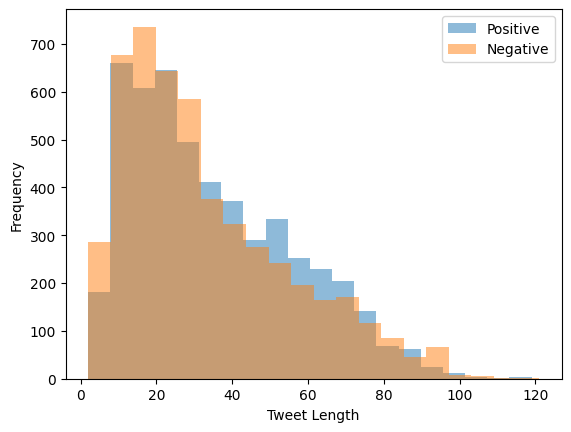

In [10]:
# Calculate tweet lengths
df_positive['tweet_length'] = df_positive['clean_tweet'].apply(len)
df_negative['tweet_length'] = df_negative['clean_tweet'].apply(len)

# Plot tweet length distribution
plt.hist(df_positive['tweet_length'], bins=20, alpha=0.5, label='Positive')
plt.hist(df_negative['tweet_length'], bins=20, alpha=0.5, label='Negative')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Remove Hyperlinks and Hashtag symbols

In [11]:
tweet = positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [12]:
# Remove URLs
tweet = re.sub(r'http\S+', '', tweet)
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… 


In [13]:
# Remove only # sign from the word
tweet = re.sub(r'#', '', tweet)
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### Tokenization

Tokenization is the process of breaking a stream of text up into words, phrases, symbols, or other meaningful elements called tokens.
1. Lowercasing: Converting the text to lower case.
2. Remove handles: Removing twitter handles (mentions) from the text.
3. Reduce lengthening: Replacing repeated character sequences of length 3 or greater with sequences of length 3.

In [14]:
# Initialize TweetTokenizer with specified parameters
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

In [15]:
# Tokenize the tweet
tokens = tokenizer.tokenize(tweet)
print(tokens)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [16]:
# Example new tweet
new_tweet = "Hi @username! I'm soooooo exciteddddd!! #NLTK 😀"

# Tokenize the tweet 
tweet_tokens = tokenizer.tokenize(new_tweet)
print(tweet_tokens)

['hi', '!', "i'm", 'sooo', 'exciteddd', '!', '!', '#nltk', '😀']


### Remove stop words and Punctuation

Stop words are the most common words in a language like “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at”, etc. These words do not carry important meaning and are usually removed from texts. 

Punctuation is the use of spacing, conventional signs, and certain typographical devices as aids to the understanding and correct reading of written text. This is usually removed from texts.

In [17]:
# Display the list of NLTK stop words in English and the punctuation symbols
stop_words = stopwords.words('english')
print(stop_words)
punctuation = string.punctuation
print(punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
print(tokens)

# Create an empty list to store the clean tweet
clean_tweet = []
for word in tokens: 
    if word not in stop_words and word not in punctuation:  
        clean_tweet.append(word)

# Print the clean tweet
print(clean_tweet)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [19]:
# Get the English stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Example list of new_tokens
new_tokens = ['hi', 'nlp', '!', 'this', 'is', 'a', 'test', 'tweet', '.', 'with', 'stop', 'words']

# Create the clean tweet using list comprehension
new_clean_tweet_list = [word for word in new_tokens if word not in stop_words and word not in punctuation]

# Print the clean tweet
print(new_clean_tweet_list)

['hi', 'nlp', 'test', 'tweet', 'stop', 'words']


### Stemming

Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. Example: “running”, “runs”, and “ran” are reduced to the stem “run”.

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

In [20]:
# Initialize the PorterStemmer
stemmer = PorterStemmer() 

In [21]:
print(clean_tweet)

# Create an empty list to store the stems of words
tweet_stem = [] 
for word in clean_tweet:
    stem_word = stemmer.stem(word)  
    tweet_stem.append(stem_word)  

# Print the stemmed words
print(tweet_stem)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [22]:
# Example list of words (new_clean_tweet)
new_clean_tweet = ['running', 'plays', 'played', 'plays']

# Perform stemming using list comprehension
new_tweet_stem = [stemmer.stem(word) for word in new_clean_tweet]

print(new_tweet_stem)

['run', 'play', 'play', 'play']


In [23]:
# Join the words back into a single string
tweet = ' '.join(tweet_stem)   
print(tweet)

beauti sunflow sunni friday morn :) sunflow favourit happi friday …


### Preprocessing Pipeline for Tweets

The <code>preprocess_tweet()</code> function is used to preprocess the tweets. It takes the tweet as input and performs the following steps:
1. <b>Remove URLs</b>
2. Remove Hashtags (only the hashtag symbol)
3. Remove numbers
4. Remove retweet text "RT"
5. <b>Tokenize the tweet</b>
6. Convert the tweet to lowercase
7. Remove mentions
8. Remove repeated characters (only 3 characters or more)
9. Remove stopwords and punctuation
10. <b>Stem the words</b>
11. Join the words back together and return the processed tweet

In [24]:
# Preprocess the tweet and display the cleaned tweet
tweet = positive_tweets[2277]
processed_tweet = preprocess_tweet(tweet)
print(processed_tweet)

beauti sunflow sunni friday morn :) sunflow favourit happi friday …


In [25]:
new_tweet = "RT @rizwan: Check out this amazing article about #LuxuryFabrics! http://entity.com.pk #Entity"
processed_tweet = preprocess_tweet(new_tweet)
print(processed_tweet)

check amaz articl luxuryfabr entiti
